# Guardian Angel - Clothing Segmentation 

# Way 2 : Cosine Similarity

In [1]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the pre-trained VGG model
weights = models.ResNet50_Weights.DEFAULT
vgg = models.resnet50(weights=weights)
vgg

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
# Load a pre-trained Faster R-CNN model for object detection
object_detection_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
object_detection_model.eval()

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
# Set the model to evaluation mode
vgg.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
# Print the VGG model architecture
print(vgg)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
# Transform to be applied on the input image
transform = weights.transforms()
transform

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [7]:
def display_image(image, title=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

In [8]:
def extract_features(image_path, resnet_model, transform, object_detection_model, confidence_threshold=0.5):
    # Read the image
    image = Image.open(image_path).convert("RGB")
    image_tensor = transforms.functional.to_tensor(image).unsqueeze(0)

    # Display the original image
    display_image(image, title="Original Image")

    # Perform object detection
    with torch.no_grad():
        detection_results = object_detection_model(image_tensor)[0]
    
    # Filter detections for person class (class 1) and high confidence
    clothing_regions = []
    for i, label in enumerate(detection_results['labels']):
        if label == 1 and detection_results['scores'][i] > confidence_threshold:
            # Get bounding box coordinates and crop the image
            bbox = detection_results['boxes'][i].cpu().numpy().astype(int)
            # Expand the bounding box slightly
            expand_ratio = 0.1
            width = bbox[2] - bbox[0]
            height = bbox[3] - bbox[1]
            expanded_bbox = [
                max(0, bbox[0] - int(width * expand_ratio)),
                max(0, bbox[1] - int(height * expand_ratio)),
                min(image.width, bbox[2] + int(width * expand_ratio)),
                min(image.height, bbox[3] + int(height * expand_ratio))
            ]
            cropped_image = image.crop((expanded_bbox[0], expanded_bbox[1], expanded_bbox[2], expanded_bbox[3]))
            clothing_regions.append(cropped_image)
    
    # Display the cropped clothing regions
    for idx, region in enumerate(clothing_regions):
        display_image(region, title=f"Cropped Clothing Region {idx + 1}")

    if not clothing_regions:
        return None  # Return None if no clothing region is found

    # Extract features for each clothing region
    features_list = []
    for region in clothing_regions:
        region_tensor = transform(region).unsqueeze(0)
        
        outs = {}
        def activation_hook(inst, inp, out):
            outs["outs"] = out

        handle_1 = resnet_model.avgpool.register_forward_hook(activation_hook)
        with torch.no_grad():
            _ = resnet_model(region_tensor)
        handle_1.remove()

        features = outs["outs"].squeeze().numpy()
        features_list.append(features)

    # Average features if multiple clothing regions are detected
    if features_list:
        features_array = np.stack(features_list)
        averaged_features = np.mean(features_array, axis=0)
        return averaged_features
    else:
        return None

### Test 1

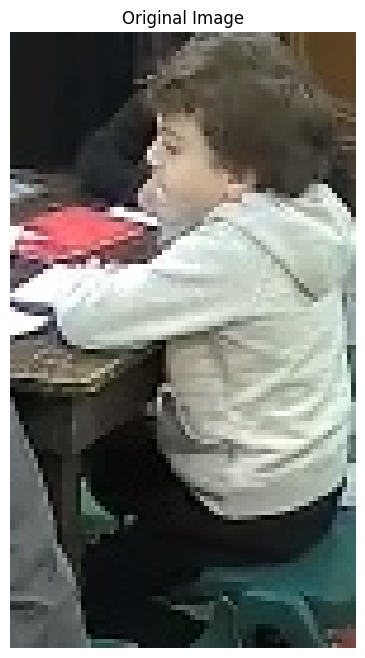

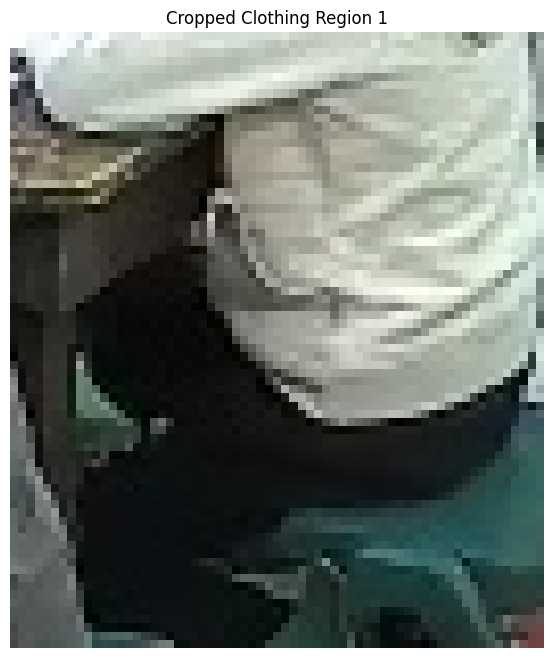

array([0.        , 0.        , 0.        , ..., 0.00125644, 0.2645037 ,
       0.00218501], dtype=float32)

In [85]:
# Extract feature 1
image_path1 = '3.jpg'
features1 = extract_features(image_path1, vgg, transform, object_detection_model, confidence_threshold=0.5)
features1

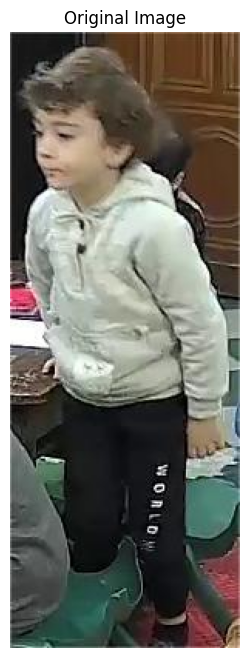

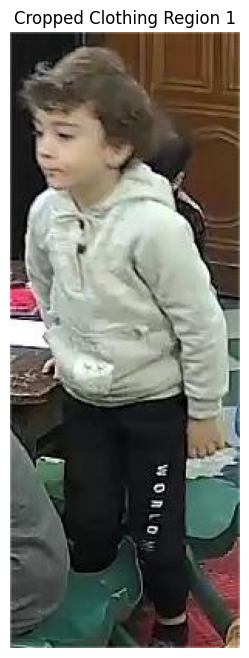

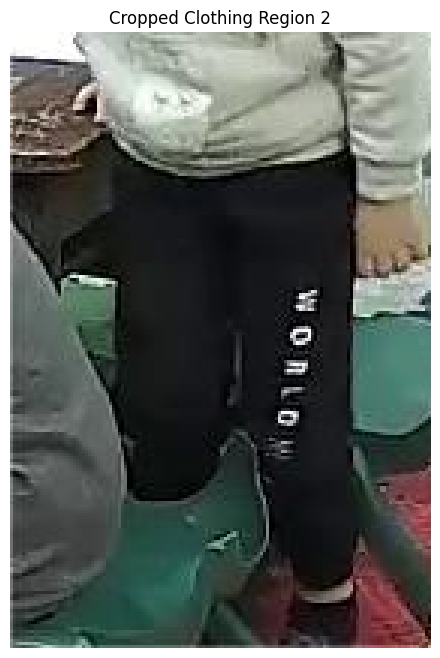

array([0.0331053 , 0.01776962, 0.04033028, ..., 0.3175706 , 0.08598731,
       0.64532465], dtype=float32)

In [86]:
# Extract feature 2
image_path2 = '4.jpg'
features2 = extract_features(image_path2, vgg, transform, object_detection_model, confidence_threshold=0.5)
features2

In [87]:
if features1 is not None and features2 is not None:
    # Calculate cosine similarity
    cosine_similarity = np.dot(features1, features2) / (norm(features1) * norm(features2))
    print("Cosine Similarity:", cosine_similarity)
else:
    print("No clothing regions detected in one or both images.")

Cosine Similarity: 0.6788747


### Test 2

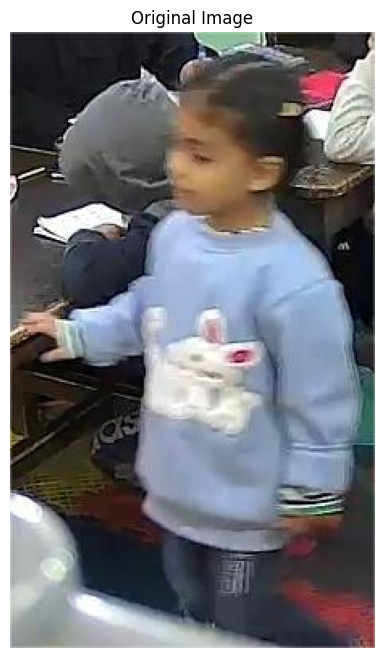

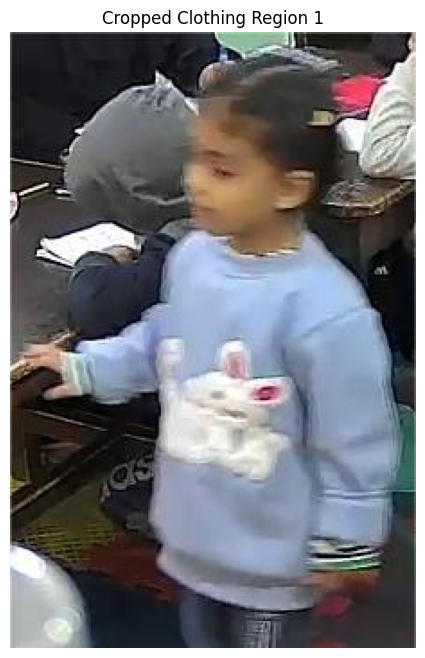

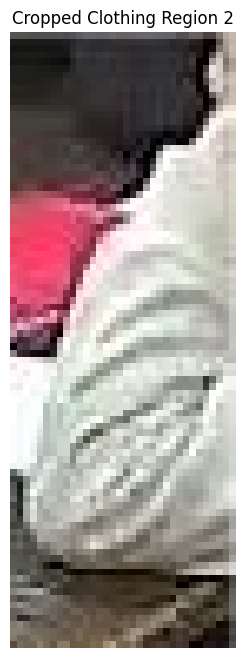

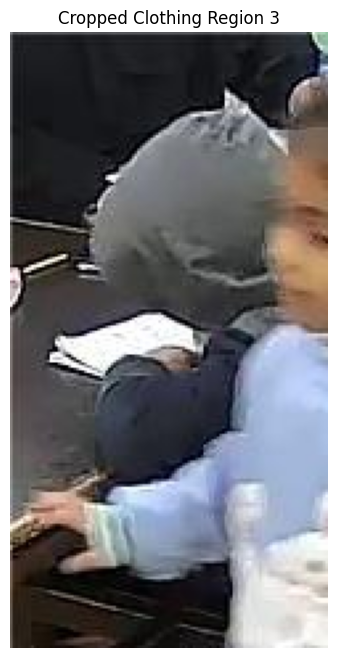

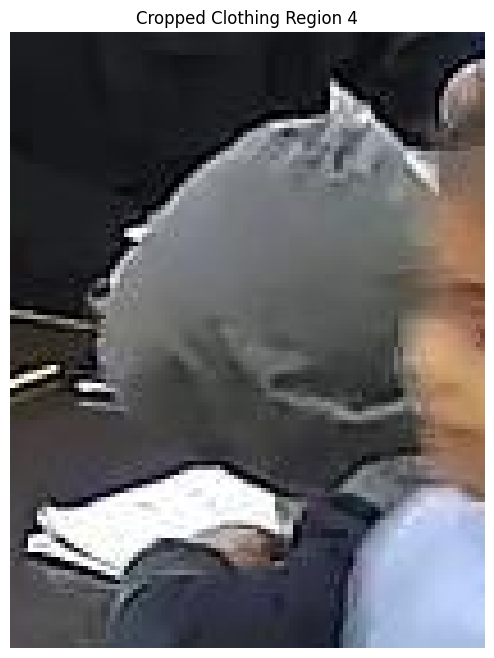

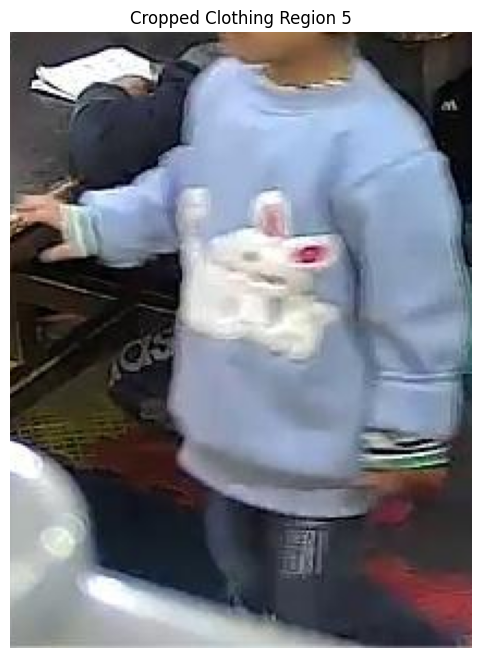

array([0.02254279, 0.00050228, 0.29645634, ..., 0.00212796, 0.02005355,
       0.20781095], dtype=float32)

In [88]:
# Extract feature 1
image_path1 = '5.jpg'
features1 = extract_features(image_path1, vgg, transform, object_detection_model, confidence_threshold=0.5)
features1

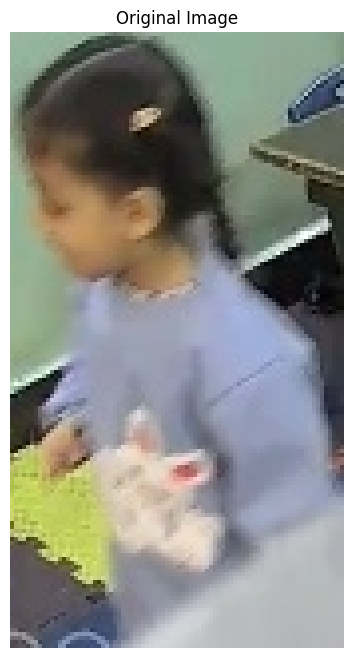

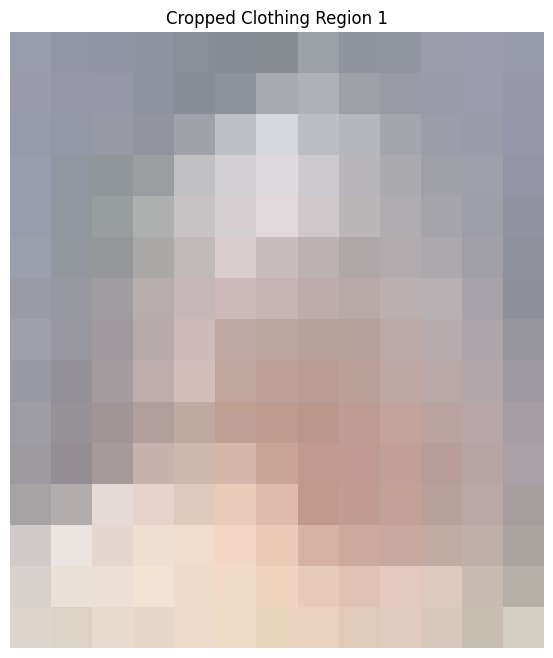

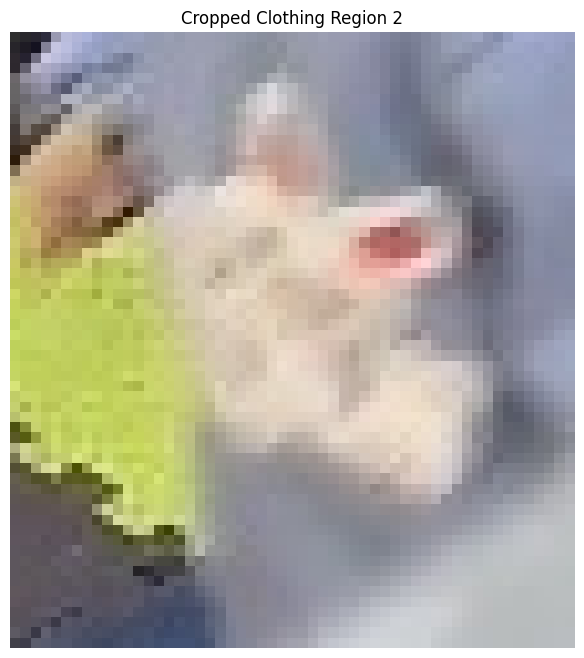

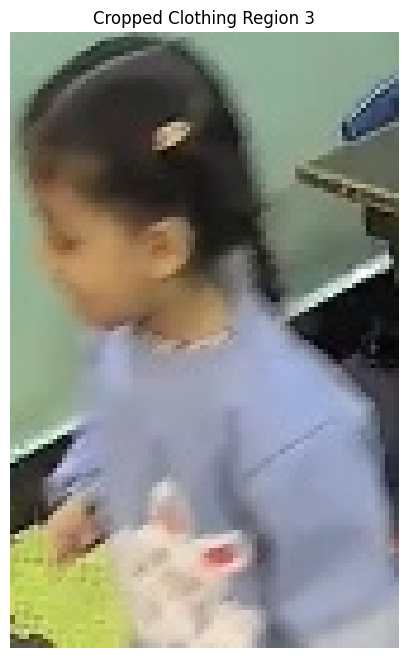

[0.00040423 0.16927402 0.11854742 ... 0.00365891 0.0437119  0.29676327]


In [89]:
# Extract feature 2
image_path2 = '6.jpg'
features2 = extract_features(image_path2, vgg, transform, object_detection_model, confidence_threshold=0.5)
print(features2)

In [90]:
if features1 is not None and features2 is not None:
    # Calculate cosine similarity
    cosine_similarity = np.dot(features1, features2) / (norm(features1) * norm(features2))
    print("Cosine Similarity:", cosine_similarity)
else:
    print("No clothing regions detected in one or both images.")

Cosine Similarity: 0.5833318


### Test 3

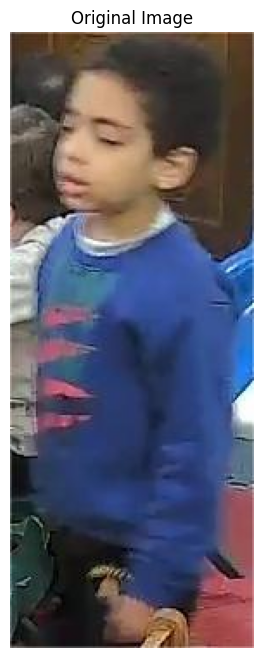

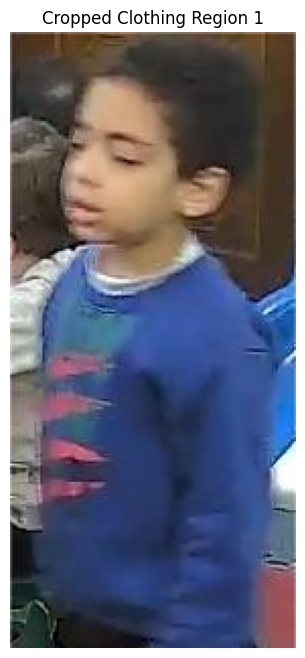

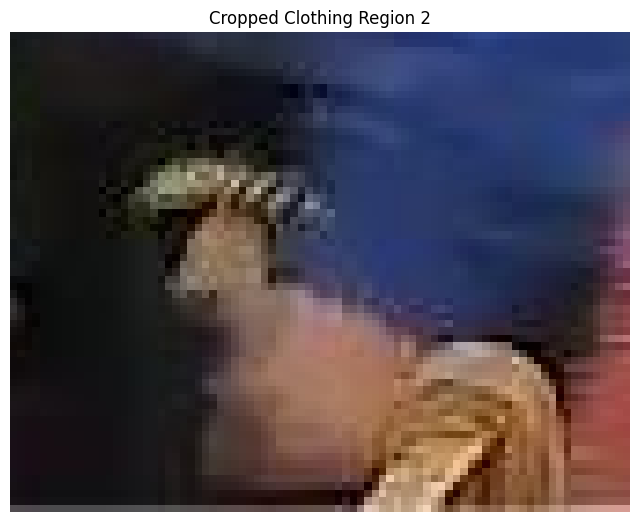

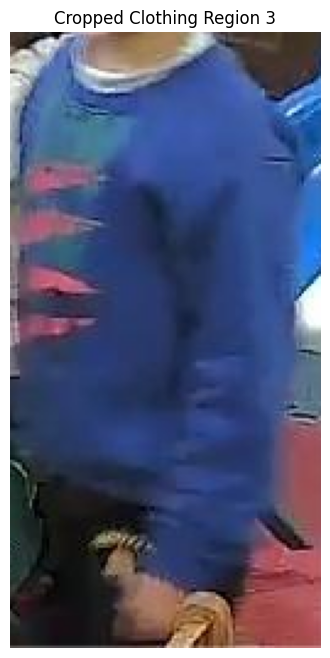

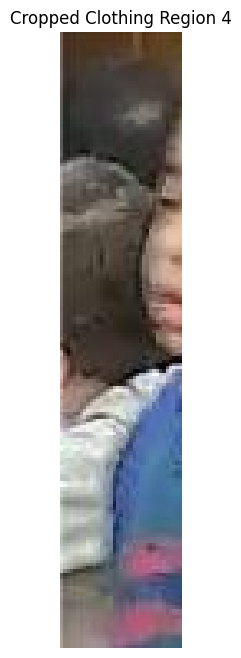

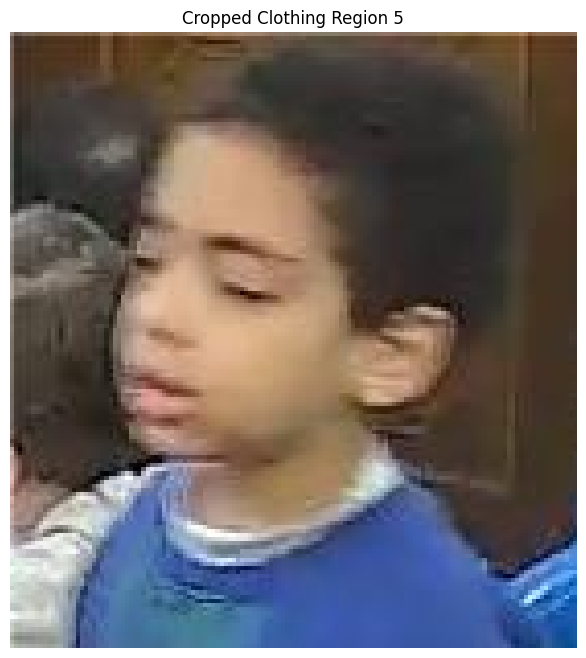

array([0.        , 0.01618909, 0.12433042, ..., 0.01044102, 0.08006117,
       0.16306636], dtype=float32)

In [91]:
# Extract feature 1
image_path1 = '7.jpg'
features1 = extract_features(image_path1, vgg, transform, object_detection_model, confidence_threshold=0.5)
features1

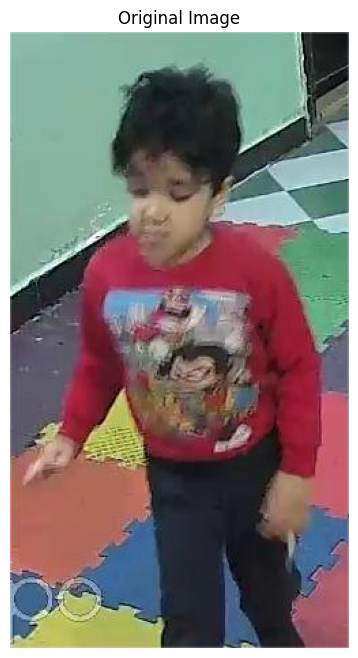

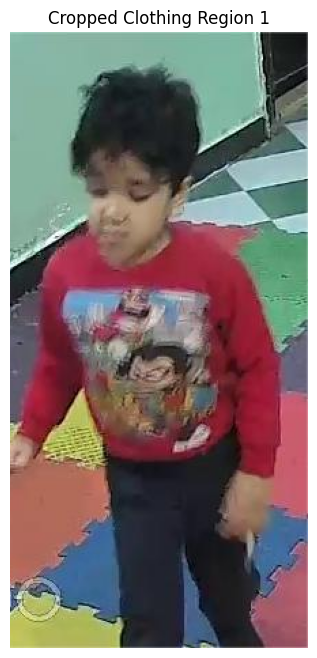

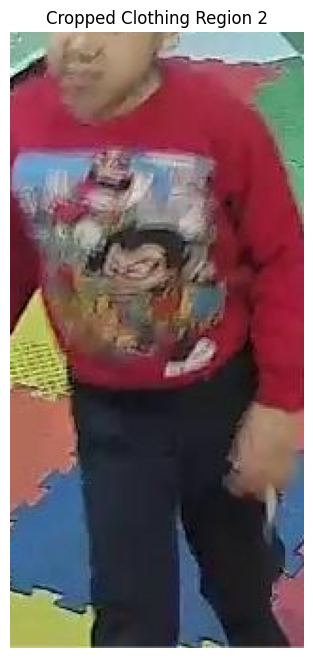

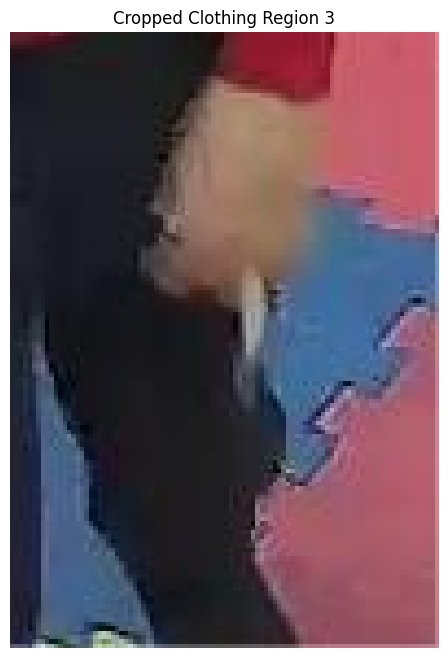

[0.02986817 0.00644699 0.13858634 ... 0.         0.08546752 0.5023709 ]


In [92]:
# Extract feature 2
image_path2 = '8.jpg'
features2 = extract_features(image_path2, vgg, transform, object_detection_model, confidence_threshold=0.5)
print(features2)

In [93]:
if features1 is not None and features2 is not None:
    # Calculate cosine similarity
    cosine_similarity = np.dot(features1, features2) / (norm(features1) * norm(features2))
    print("Cosine Similarity:", cosine_similarity)
else:
    print("No clothing regions detected in one or both images.")

Cosine Similarity: 0.7248408


### Test 4

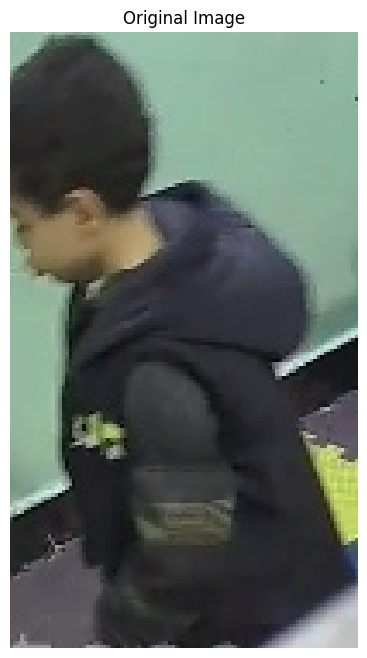

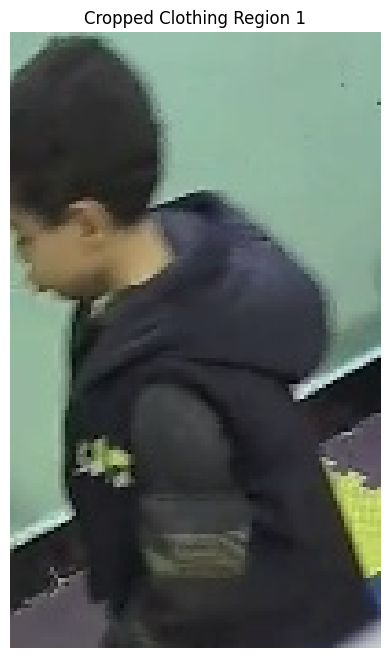

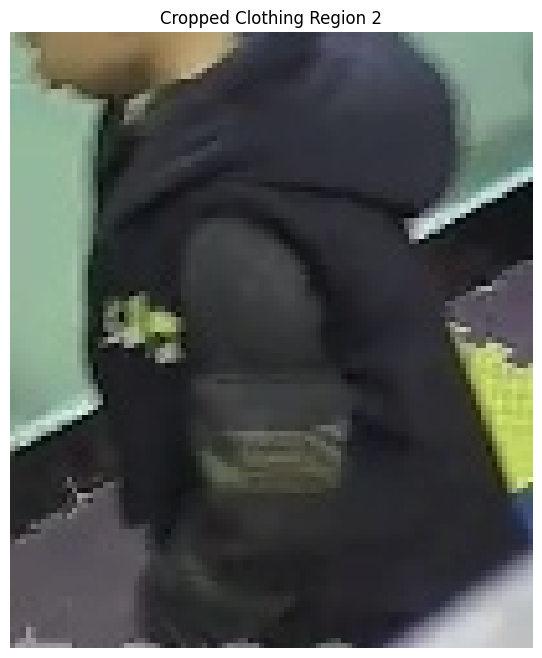

array([0.        , 0.0734785 , 0.06349345, ..., 0.00884869, 0.20143758,
       0.32094133], dtype=float32)

In [94]:
# Extract feature 1
image_path1 = '9.jpg'
features1 = extract_features(image_path1, vgg, transform, object_detection_model, confidence_threshold=0.5)
features1

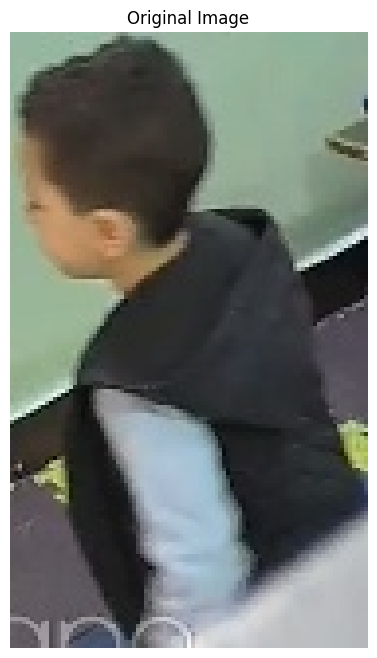

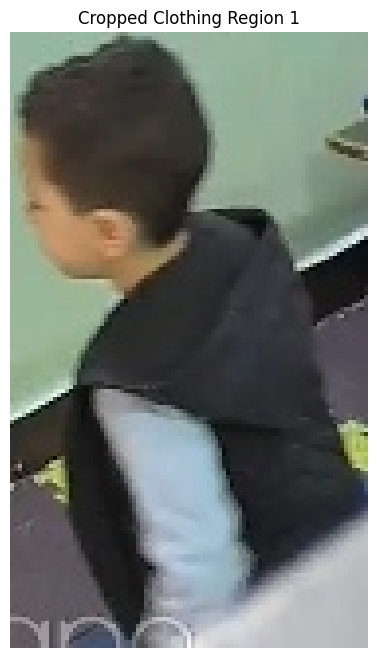

[0.01184165 0.         0.26175845 ... 0.         0.21089713 0.39155087]


In [95]:
# Extract feature 2
image_path2 = '10.jpg'
features2 = extract_features(image_path2, vgg, transform, object_detection_model, confidence_threshold=0.5)
print(features2)

In [96]:
if features1 is not None and features2 is not None:
    # Calculate cosine similarity
    cosine_similarity = np.dot(features1, features2) / (norm(features1) * norm(features2))
    print("Cosine Similarity:", cosine_similarity)
else:
    print("No clothing regions detected in one or both images.")

Cosine Similarity: 0.7816969


# Test 5

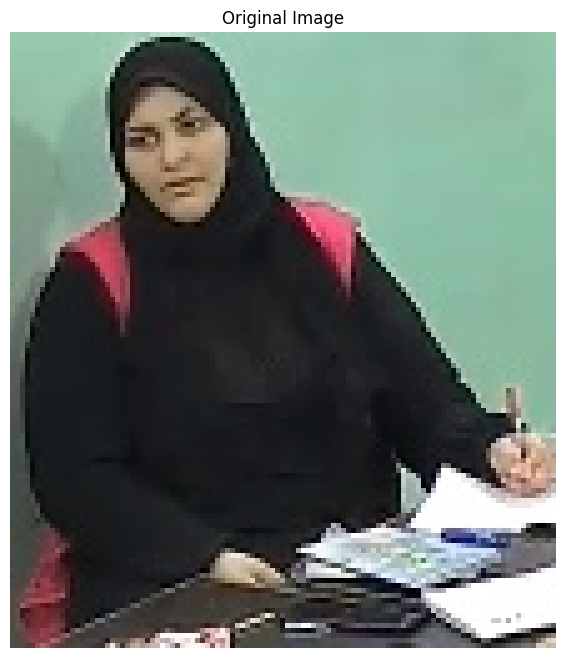

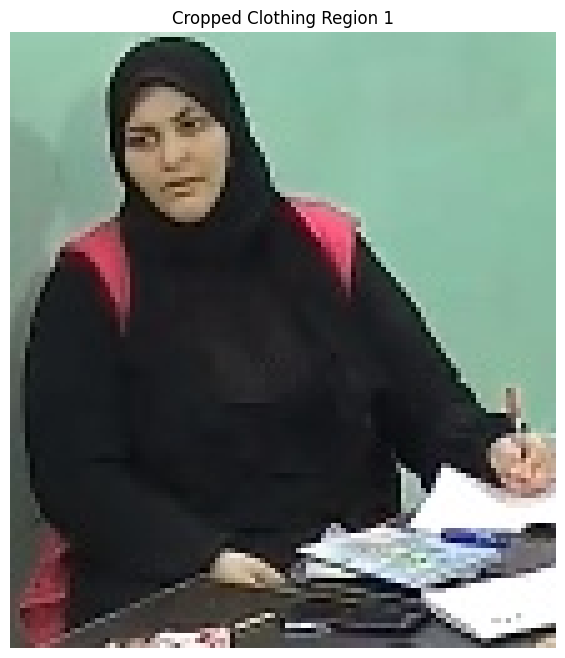

array([0.        , 0.        , 0.14847133, ..., 0.        , 0.00746352,
       0.04295961], dtype=float32)

In [9]:
# Extract feature 1
image_path1 = 'black_1.jpg'
features1 = extract_features(image_path1, vgg, transform, object_detection_model, confidence_threshold=0.5)
features1

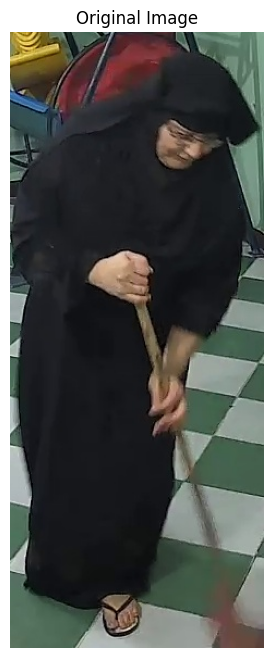

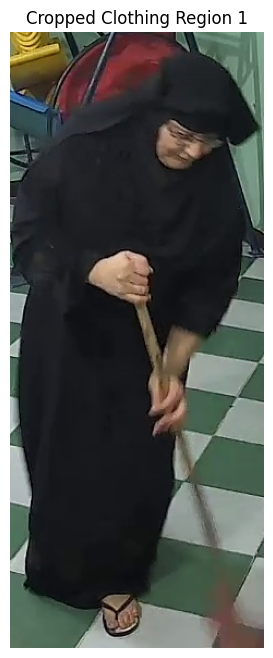

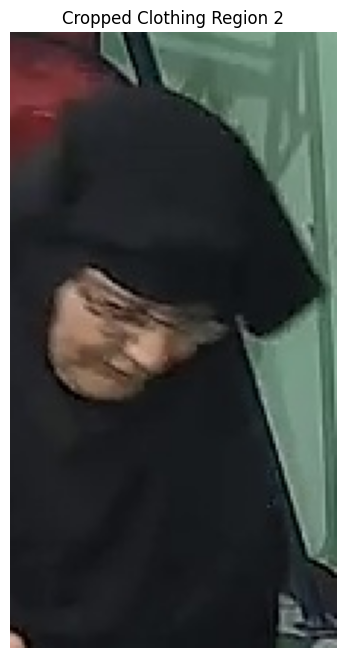

[0.09299401 0.         0.3978343  ... 0.         0.20123246 0.12556262]


In [12]:
# Extract feature 2
image_path2 = 'black_2.jpg'
features2 = extract_features(image_path2, vgg, transform, object_detection_model, confidence_threshold=0.5)
print(features2)

In [13]:
if features1 is not None and features2 is not None:
    # Calculate cosine similarity
    cosine_similarity = np.dot(features1, features2) / (norm(features1) * norm(features2))
    print("Cosine Similarity:", cosine_similarity)
else:
    print("No clothing regions detected in one or both images.")

Cosine Similarity: 0.6007206


# Way 1 : segmentation


+ Models used for `semantic segmentation` tasks, including `clothing segmentation`:

1. **U-Net**:
   - U-Net is a popular choice for semantic segmentation tasks due to its simplicity and effectiveness, especially when working with limited training data.
   - It consists of a contracting path (encoder) followed by an expanding path (decoder) to capture high-resolution features and perform precise segmentation.
   - U-Net has been successfully applied to various segmentation tasks, including medical image segmentation and clothing segmentation.

2. **DeepLab**:
   - DeepLab is a state-of-the-art convolutional neural network architecture designed for semantic image segmentation.
   - It utilizes atrous (dilated) convolutions to effectively capture multi-scale information and maintain high-resolution feature maps.
   - DeepLab has several variants, such as DeepLabv1, DeepLabv2, DeepLabv3, and DeepLabv3+, each with improvements in performance and efficiency.

3. **Mask R-CNN**:
   - Mask R-CNN is an extension of Faster R-CNN, a popular object detection model, with an added branch for pixel-level segmentation.
   - It simultaneously predicts object bounding boxes and generates segmentation masks for each instance in the image.
   - Mask R-CNN is known for its accuracy and versatility, making it suitable for tasks like instance segmentation, including clothing segmentation.

4. **PSPNet (Pyramid Scene Parsing Network)**:
   - PSPNet is designed to capture global context information by incorporating a pyramid pooling module.
   - It leverages multiple scales of features to make predictions at different resolutions, enabling accurate segmentation of objects at various sizes.
   - PSPNet has shown excellent performance on challenging segmentation datasets and can be adapted for clothing segmentation tasks.

5. **HRNet (High-Resolution Network)**:
   - HRNet maintains high-resolution representations throughout the network by aggregating multi-scale information at each stage.
   - It preserves spatial details better than architectures that downsample feature maps early in the network.
   - HRNet achieves state-of-the-art performance on various segmentation benchmarks and can be beneficial for tasks where fine-grained details are crucial, such as clothing segmentation.

In [97]:
# !pip install torch torchvision

In [98]:
# import torch
# # Clear Cach
# # torch.cuda.empty_cache()
# from torchvision.models.segmentation import deeplabv3_resnet50

# # # # Download the model weights
# model = deeplabv3_resnet50(pretrained=True)
# model

In [99]:
# import torch
# # Clear Cach
# torch.cuda.empty_cache()
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# # # or any of these variants
# # # model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# # # model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
# # model.eval()

Download an example image from the pytorch website

In [100]:
# import urllib
# url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
# try: urllib.URLopener().retrieve(url, filename)
# except: urllib.request.urlretrieve(url, filename)

sample execution (requires torchvision)

In [101]:
# # sample execution (requires torchvision)
# from PIL import Image
# from torchvision import transforms
# input_image = Image.open(filename).convert("RGB")
# preprocess = transforms.Compose([
#     transforms.Resize((256, 256)),  # Resize the image to a fixed size
#     transforms.ToTensor(),            # Convert PIL Image to PyTorch tensor
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
# ])

# input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
# print(input_batch.shape)  # Output should be: torch.Size([1, 3, 256, 256])

create a color pallette, selecting a color for each class

In [102]:
# if torch.cuda.is_available():
#     input_batch = input_batch.to('cuda')
#     model.to('cuda')
# model.eval()

In [103]:
# with torch.no_grad():
#     output = model(input_batch)['out'][0]
# output_predictions = output.argmax(0)

create a color pallette, selecting a color for each class

In [104]:
# palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
# colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
# colors = (colors % 255).numpy().astype("uint8")

# # plot the semantic segmentation predictions of 21 classes in each color
# r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
# r.putpalette(colors)

# import matplotlib.pyplot as plt
# plt.imshow(r)
# # plt.show()